In [7]:
#importing the libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt


In [8]:
#Uploading the zip file
zip_file_path = '/content/zipped/Group_Project_Data 2.zip'

In [9]:
#Extracting the file
extract_to_path = '/content/unzipped'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [10]:
#defining the path for train and valid
training_path = '/content/unzipped/Group_Project_Data/Train'
validation_path = '/content/unzipped/Group_Project_Data/Valid'
train_real_dir = os.path.join(training_path, 'Real')
train_fake_dir = os.path.join(training_path, 'Fake')
test_real_dir = os.path.join(validation_path, 'Real')
test_fake_dir = os.path.join(validation_path, 'Fake')

train_real_filenames = os.listdir(train_real_dir)
train_fake_filenames = os.listdir(train_fake_dir)
test_real_filenames = os.listdir(test_real_dir)
test_fake_filenames = os.listdir(test_fake_dir)

train_real_filenames = [os.path.join(train_real_dir, filename) for filename in train_real_filenames]
train_fake_filenames = [os.path.join(train_fake_dir, filename) for filename in train_fake_filenames]
test_real_filenames = [os.path.join(test_real_dir, filename) for filename in test_real_filenames]
test_fake_filenames = [os.path.join(test_fake_dir, filename) for filename in test_fake_filenames]

train_filenames = train_real_filenames + train_fake_filenames
test_filenames = test_real_filenames + test_fake_filenames
train_labels = [0] * len(train_real_filenames) + [1] * len(train_fake_filenames)
test_labels = [0] * len(test_real_filenames) + [1] * len(test_fake_filenames)



In [11]:
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add a second convolutional layer with 64 filters and 3x3 kernel size
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add a third convolutional layer with 128 filters and 3x3 kernel size
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add a fourth convolutional layer with 128 filters and 3x3 kernel size
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add dropout to prevent overfitting
model.add(Dropout(0.5))

# Add the final output layer with 1 unit and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
# Create the data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(training_path,
                                                    target_size=(150, 150),
                                                    batch_size=5,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(validation_path,
                                                  target_size=(150, 150),
                                                  batch_size=5,
                                                  class_mode='binary')


Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=50)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Epoch 1/15
100/100 [==============================] - 12s 11ms/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6895 - val_accuracy: 0.6880
Epoch 2/15
100/100 [==============================] - 1s 9ms/step - loss: 0.6911 - accuracy: 0.5480 - val_loss: 0.6867 - val_accuracy: 0.6720
Epoch 3/15
100/100 [==============================] - 1s 9ms/step - loss: 0.6859 - accuracy: 0.5800 - val_loss: 0.6839 - val_accuracy: 0.5160
Epoch 4/15
100/100 [==============================] - 1s 9ms/step - loss: 0.6849 - accuracy: 0.5960 - val_loss: 0.6774 - val_accuracy: 0.5080
Epoch 5/15
100/100 [==============================] - 1s 9ms/step - loss: 0.6789 - accuracy: 0.6040 - val_loss: 0.6765 - val_accuracy: 0.4960
Epoch 6/15
100/100 [==============================] - 1s 9ms/step - loss: 0.6638 - accuracy: 0.6440 - val_loss: 0.6593 - val_accuracy: 0.5320
Epoch 7/15
100/100 [==============================] - 1s 9ms/step - loss: 0.6470 - accuracy: 0.6320 - val_loss: 0.7316 - val_accuracy: 0.5120
Epoc

400/400 - 2s - loss: 0.0651 - accuracy: 0.9890 - 2s/epoch - 4ms/step
400/400 [==============================] - 2s 4ms/step


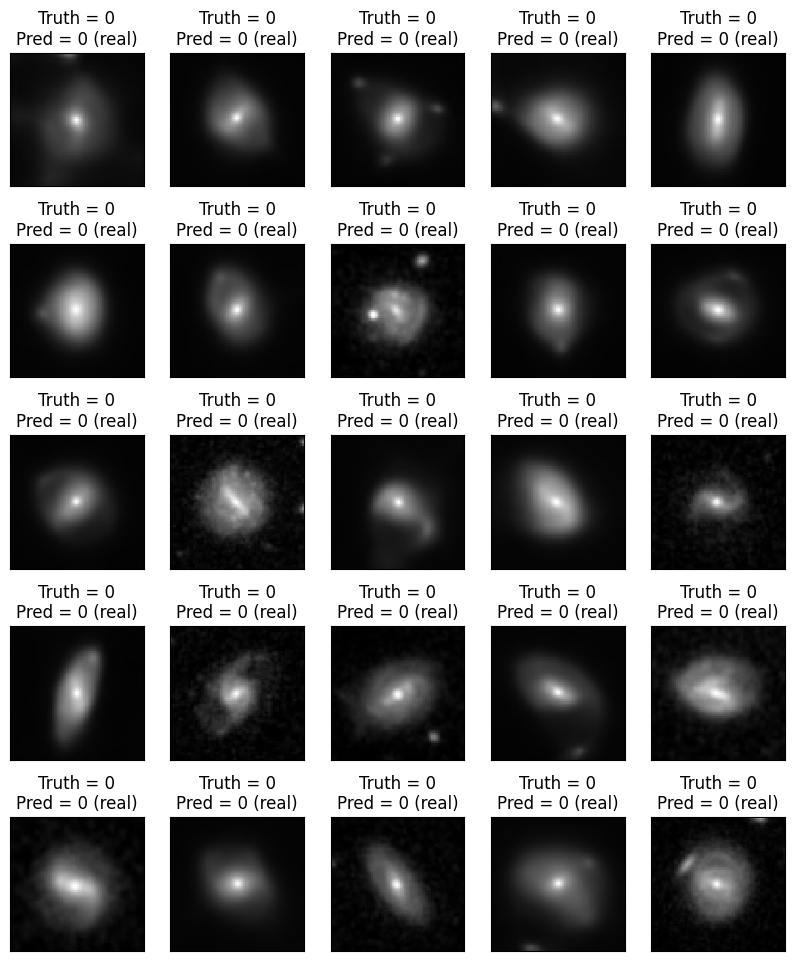

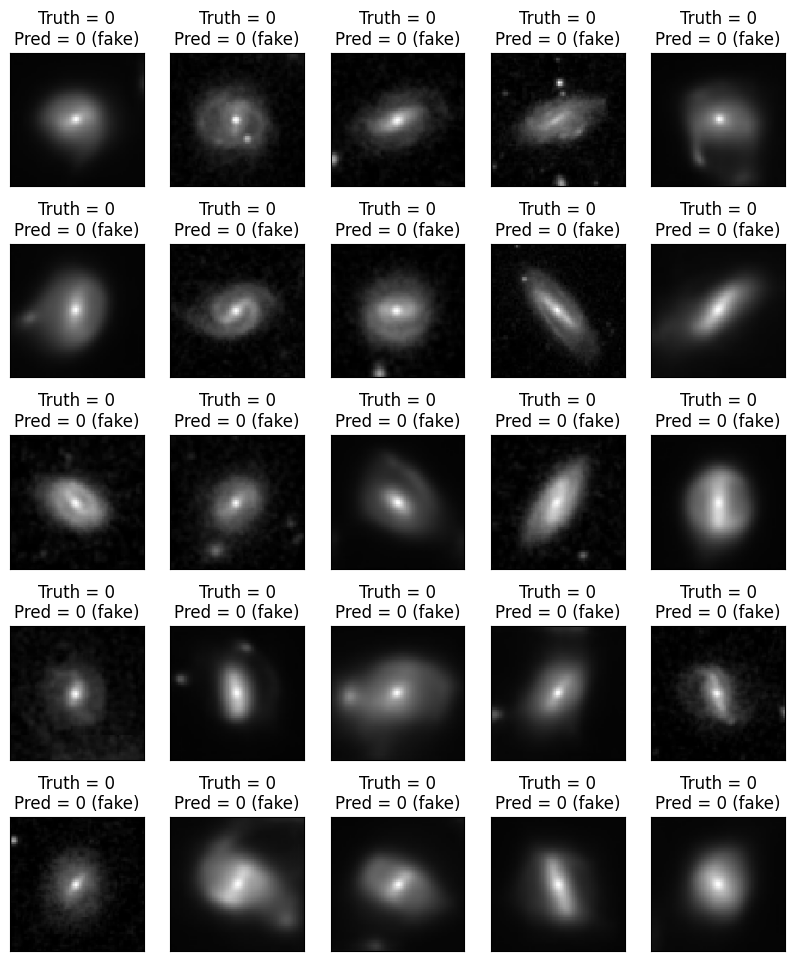

In [22]:
### Repeat your analysis from task 1, creating plots of the losses, metrics AND
### predicted classifications of images in the test set.
# Evaluate the model on the test set
# Make predictions on the test set
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_label = np.argmax(y_pred, axis=1)

# Get labels of the test set
test_labels = test_generator.classes

# Get indexes of correctly and incorrectly labeled images
correct_idx = np.where(y_pred_label == test_labels)[0]
incorrect_idx = np.where(y_pred_label != test_labels)[0]

# Plot correct images
f, ax = plt.subplots(5, 5, figsize=(10, 12))
ax = ax.flatten()
for i in range(25):
    idx = correct_idx[i]
    img = test_generator[idx][0][0]
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(f'Truth = {test_labels[idx]}\nPred = {y_pred_label[idx]} (real)')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

# Plot fake images
# Plot incorrect images
f, ax = plt.subplots(5, 5, figsize=(10, 12))
ax = ax.flatten()
for i in range(25):
    idx = incorrect_idx[i]
    while idx >= len(test_generator):
        idx -= len(test_generator)
    img = test_generator[idx][0][0]
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(f'Truth = {test_labels[idx]}\nPred = {y_pred_label[idx]} (fake)')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


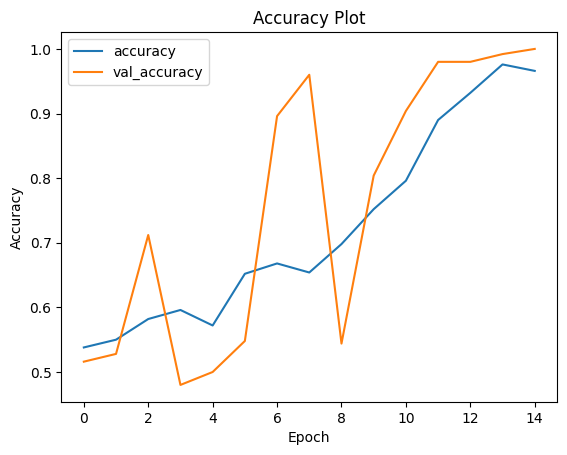

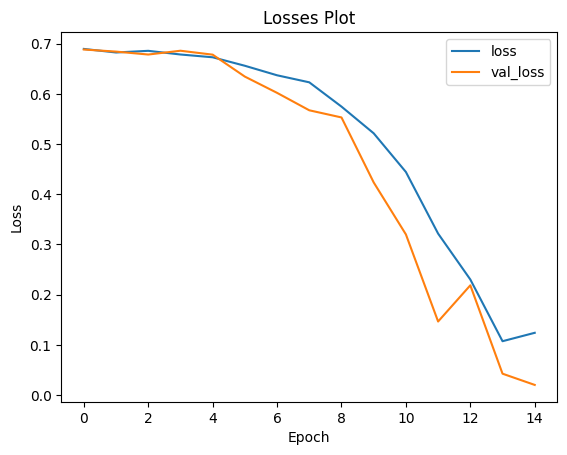

In [34]:

#Plot against Accuracy and val_acc against epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Plot against loss and val_loss against epoch
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Losses Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()